In [13]:
from os.path import join

image_dir = 'train/'
img_paths = [join(image_dir, filename) for filename in 
                           ['rakia.jpg',
                            'test.jpg',
                            '0c8fe33bd89646b678f6b2891df8a1c6.jpg',
                            '0c3b282ecbed1ca9eb17de4cb1b6e326.jpg',
                            '04fb4d719e9fe2b6ffe32d9ae7be8a22.jpg',
                            '0e79be614f12deb4f7cae18614b7391b.jpg']]

In [14]:
import numpy as np
from tensorflow.keras.applications.resnet50  import preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array

image_size = 224

def read_and_prep_images(img_paths, img_height=image_size, img_width=image_size):
    imgs = [load_img(img_path, target_size=(img_height, img_width)) for img_path in img_paths]
    img_array = np.array([img_to_array(img) for img in imgs])
    output = preprocess_input(img_array)
    return(output)

In [15]:
from tensorflow.keras.applications import ResNet50

my_model = ResNet50(weights='imagenet')
test_data = read_and_prep_images(img_paths)
preds = my_model.predict(test_data)

1/1 [==============================] - 7s 7s/step


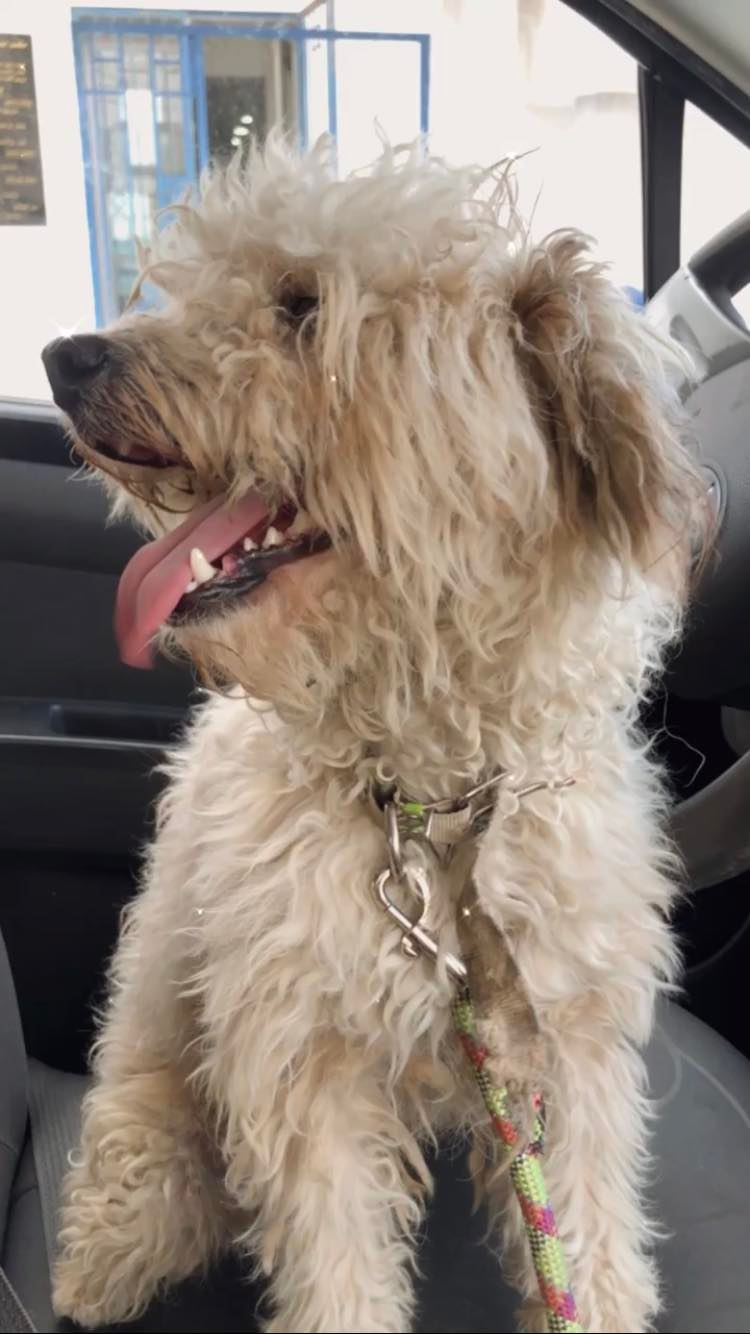

[('n02095570', 'Lakeland_terrier', 0.6457285), ('n02093991', 'Irish_terrier', 0.09471652), ('n02094114', 'Norfolk_terrier', 0.09156684)]


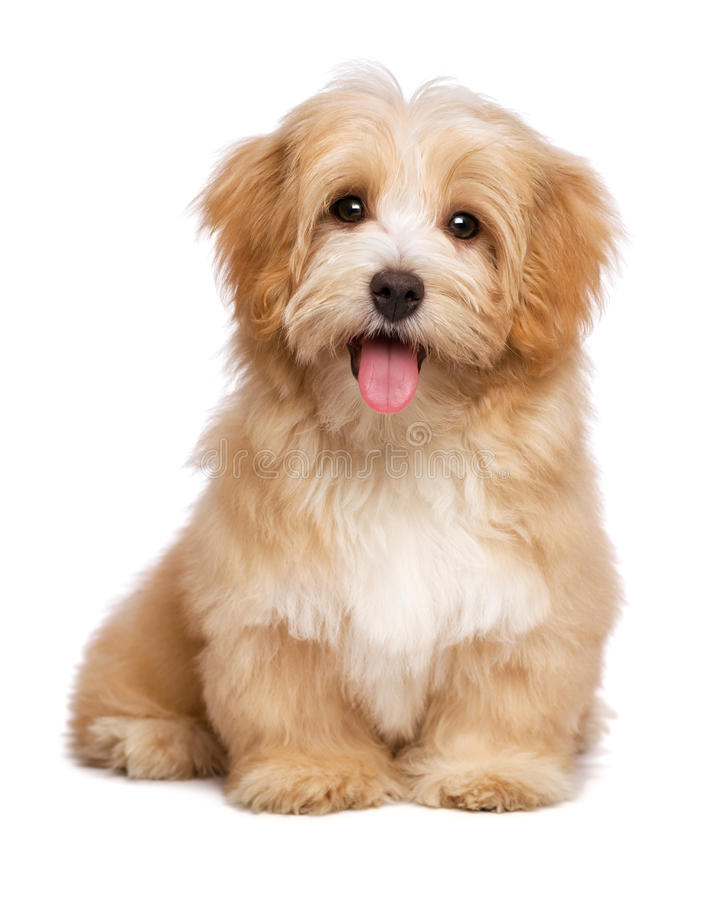

[('n02094114', 'Norfolk_terrier', 0.86012787), ('n02098413', 'Lhasa', 0.072162956), ('n02086079', 'Pekinese', 0.018263236)]


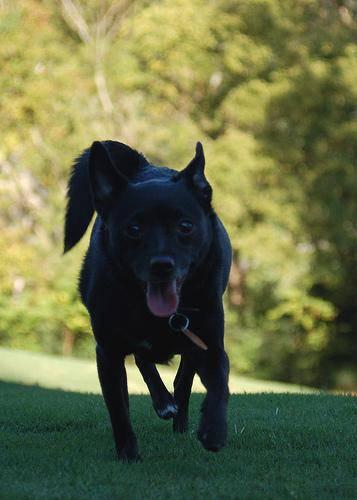

[('n02093256', 'Staffordshire_bullterrier', 0.37935826), ('n02099712', 'Labrador_retriever', 0.26180524), ('n02093428', 'American_Staffordshire_terrier', 0.21227573)]


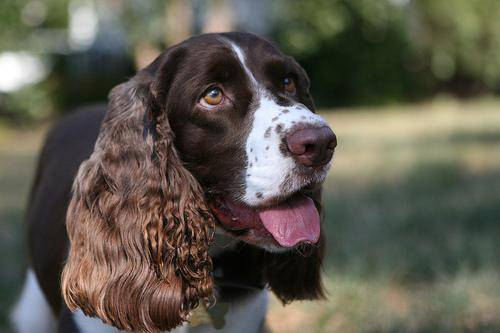

[('n02102040', 'English_springer', 0.9437974), ('n02101556', 'clumber', 0.0236351), ('n02102480', 'Sussex_spaniel', 0.009090548)]


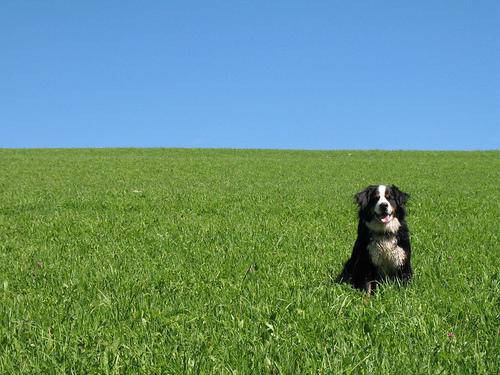

[('n02107683', 'Bernese_mountain_dog', 0.45761225), ('n02100735', 'English_setter', 0.25876454), ('n02102040', 'English_springer', 0.123043045)]


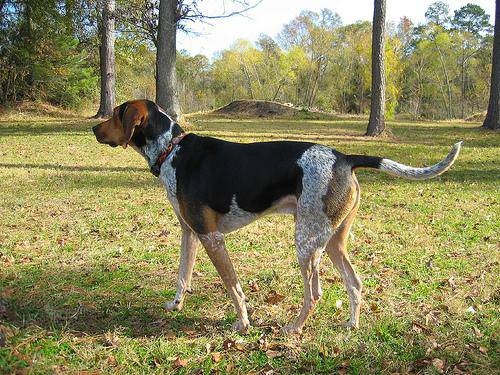

[('n02088632', 'bluetick', 0.9917441), ('n02089867', 'Walker_hound', 0.006791513), ('n02089973', 'English_foxhound', 0.0008508475)]


In [16]:
from learntools.deep_learning.decode_predictions import decode_predictions
from IPython.display import Image, display

most_likely_labels = decode_predictions(preds, top=3, class_list_path='C:\\Users\\Asma Ben Boubaker\\input\\ResNet-50\\imagenet_class_index.json')

for i, img_path in enumerate(img_paths):
    display(Image(img_path))
    print(most_likely_labels[i])

##### 